In [2]:
import pandas as pd

# Load your file
df = pd.read_csv(r"C:\Users\samru\Downloads\order_items.csv") # file name
print(df.head())
print(df.columns)


                             Date  \
0  2022-10-20 18:38:41.000000 UTC   
1  2025-08-05 08:09:30.000000 UTC   
2  2023-10-18 12:42:42.000000 UTC   
3  2024-11-04 08:59:55.000000 UTC   
4  2020-10-26 02:20:41.000000 UTC   

                                             Product      Status  Revenue  
0         Indestructable Aluminum Aluma Wallet - RED   Cancelled     0.02  
1         Indestructable Aluminum Aluma Wallet - RED    Returned     0.02  
2  Set of 2 - Replacement Insert For Checkbook Wa...    Complete     0.49  
3  Set of 2 - Replacement Insert For Checkbook Wa...    Complete     0.49  
4  Set of 2 - Replacement Insert For Checkbook Wa...  Processing     0.49  
Index(['Date', 'Product', 'Status', 'Revenue'], dtype='object')


In [3]:
# Convert to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')


C:\Users\samru\AppData\Local\Temp\ipykernel_14520\2873501211.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Date'].dt.to_period('M')


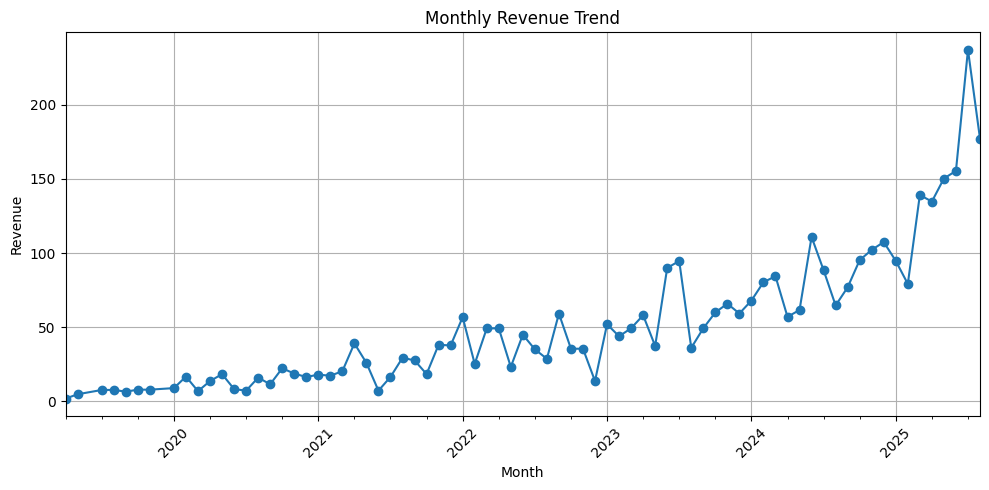

In [4]:
import matplotlib.pyplot as plt

monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(10, 5))
monthly_revenue.plot(marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Products:
 Product
Classic Tortoise Wayfarer Style Sunglasses                                         74.849997
Cashmere Feel Patterened Unisex Pashmina Scarf - Plaid/Checks/Stripes Available    73.279999
LRG Crew Sock                                                                      70.000000
LOCS Sunglasses Hardcore Black Dark Lens 0103 Designer Stylish w Bag               66.670000
NEW Aluminum Credit Card Wallet - RFID Blocking Case - Pink (New Products)         63.150001
Name: Revenue, dtype: float64


C:\Users\samru\AppData\Local\Temp\ipykernel_14520\673359088.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


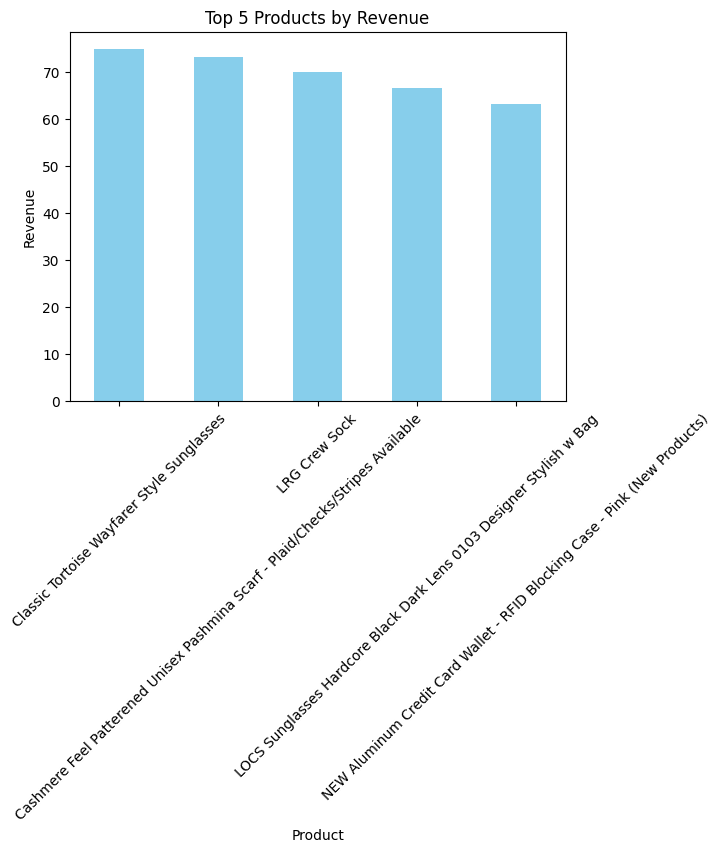

In [5]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)

print("Top 5 Products:\n", top_products)

# Optional bar chart
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 5 Products by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
total_revenue = df['Revenue'].sum()
top5_revenue = 74.85 + 73.28 + 70.00 + 66.67 + 63.15  # sum of your top 5 products' revenue
top5_percentage = (top5_revenue / total_revenue) * 100
print(f"Top 5 products contribute {top5_percentage:.2f}% of total revenue")


Top 5 products contribute 9.10% of total revenue


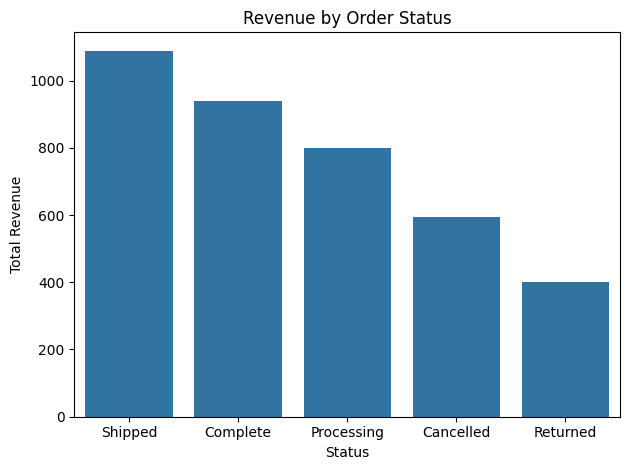

In [5]:
import seaborn as sns

status_revenue = df.groupby('Status')['Revenue'].sum().sort_values(ascending=False)

sns.barplot(x=status_revenue.index, y=status_revenue.values)
plt.title("Revenue by Order Status")
plt.ylabel("Total Revenue")
plt.xlabel("Status")
plt.tight_layout()
plt.show()
